In [1]:
import detectron2
from detectron2.data import DatasetCatalog,MetadataCatalog
from plain_train_net import grab_dataset
from detectron2.utils.visualizer import Visualizer
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


try:
    DatasetCatalog.register("test", grab_dataset("round2_trainval_data/test_refined"))
except:
    print('Already registered.')
    #do nothing

MetadataCatalog.get("test").thing_classes = ["rpd"]   


In [9]:
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file('configs/working.yaml')
cfg.merge_from_list(['SOLVER.IMS_PER_BATCH', '1'])
print(cfg.TEST)

AUG:
  ENABLED: False
  FLIP: True
  MAX_SIZE: 4000
  MIN_SIZES: (400, 500, 600, 700, 800, 900, 1000, 1100, 1200)
DETECTIONS_PER_IMAGE: 30
EVAL_PERIOD: 300
EXPECTED_RESULTS: []
KEYPOINT_OKS_SIGMAS: []
PRECISE_BN:
  ENABLED: False
  NUM_ITER: 200


In [3]:
from detectron2.data import build_detection_train_loader
#myloader = build_detection_train_loader(cfg)
from detectron2.data import transforms as T
# Define a sequence of augmentations:
augs = [
    T.RandomBrightness(.9, 1.1),
    #T.RandomFlip(prob=0.5),
    #T.RandomRotation([-10,10]),
    T.RandomContrast(.8,1.2)
    #T.RandomCrop("absolute", (640, 640))
]  # type: T.Augmentation
from detectron2.data import DatasetMapper   # the default mapper
# import pdb
# pdb.set_trace()
myloader = build_detection_train_loader(cfg,dataset=DatasetCatalog.get("test"),
                                          mapper=DatasetMapper(cfg, is_train=True, augmentations=augs)
                                         )

In [4]:
import torch
def get_inputs():
    with torch.no_grad():
        for data in myloader:
            yield data
gen = get_inputs()

In [7]:
inputs = next(gen)

inputs[0]['instances']

Instances(num_instances=6, image_height=618, image_width=1077, fields=[gt_boxes: Boxes(tensor([[244.7908, 300.2282, 284.3550, 311.9615],
        [188.0989, 305.7400, 231.6329, 317.9641],
        [341.9273, 286.8409, 384.4688, 298.9423],
        [ 81.2941, 314.7681, 118.0037, 327.1256],
        [130.9162, 307.7730, 174.6956, 321.9820],
        [732.6129, 213.6562, 757.4026, 232.3578]])), gt_classes: tensor([0, 0, 0, 0, 0, 0]), gt_masks: PolygonMasks(num_instances=6)])

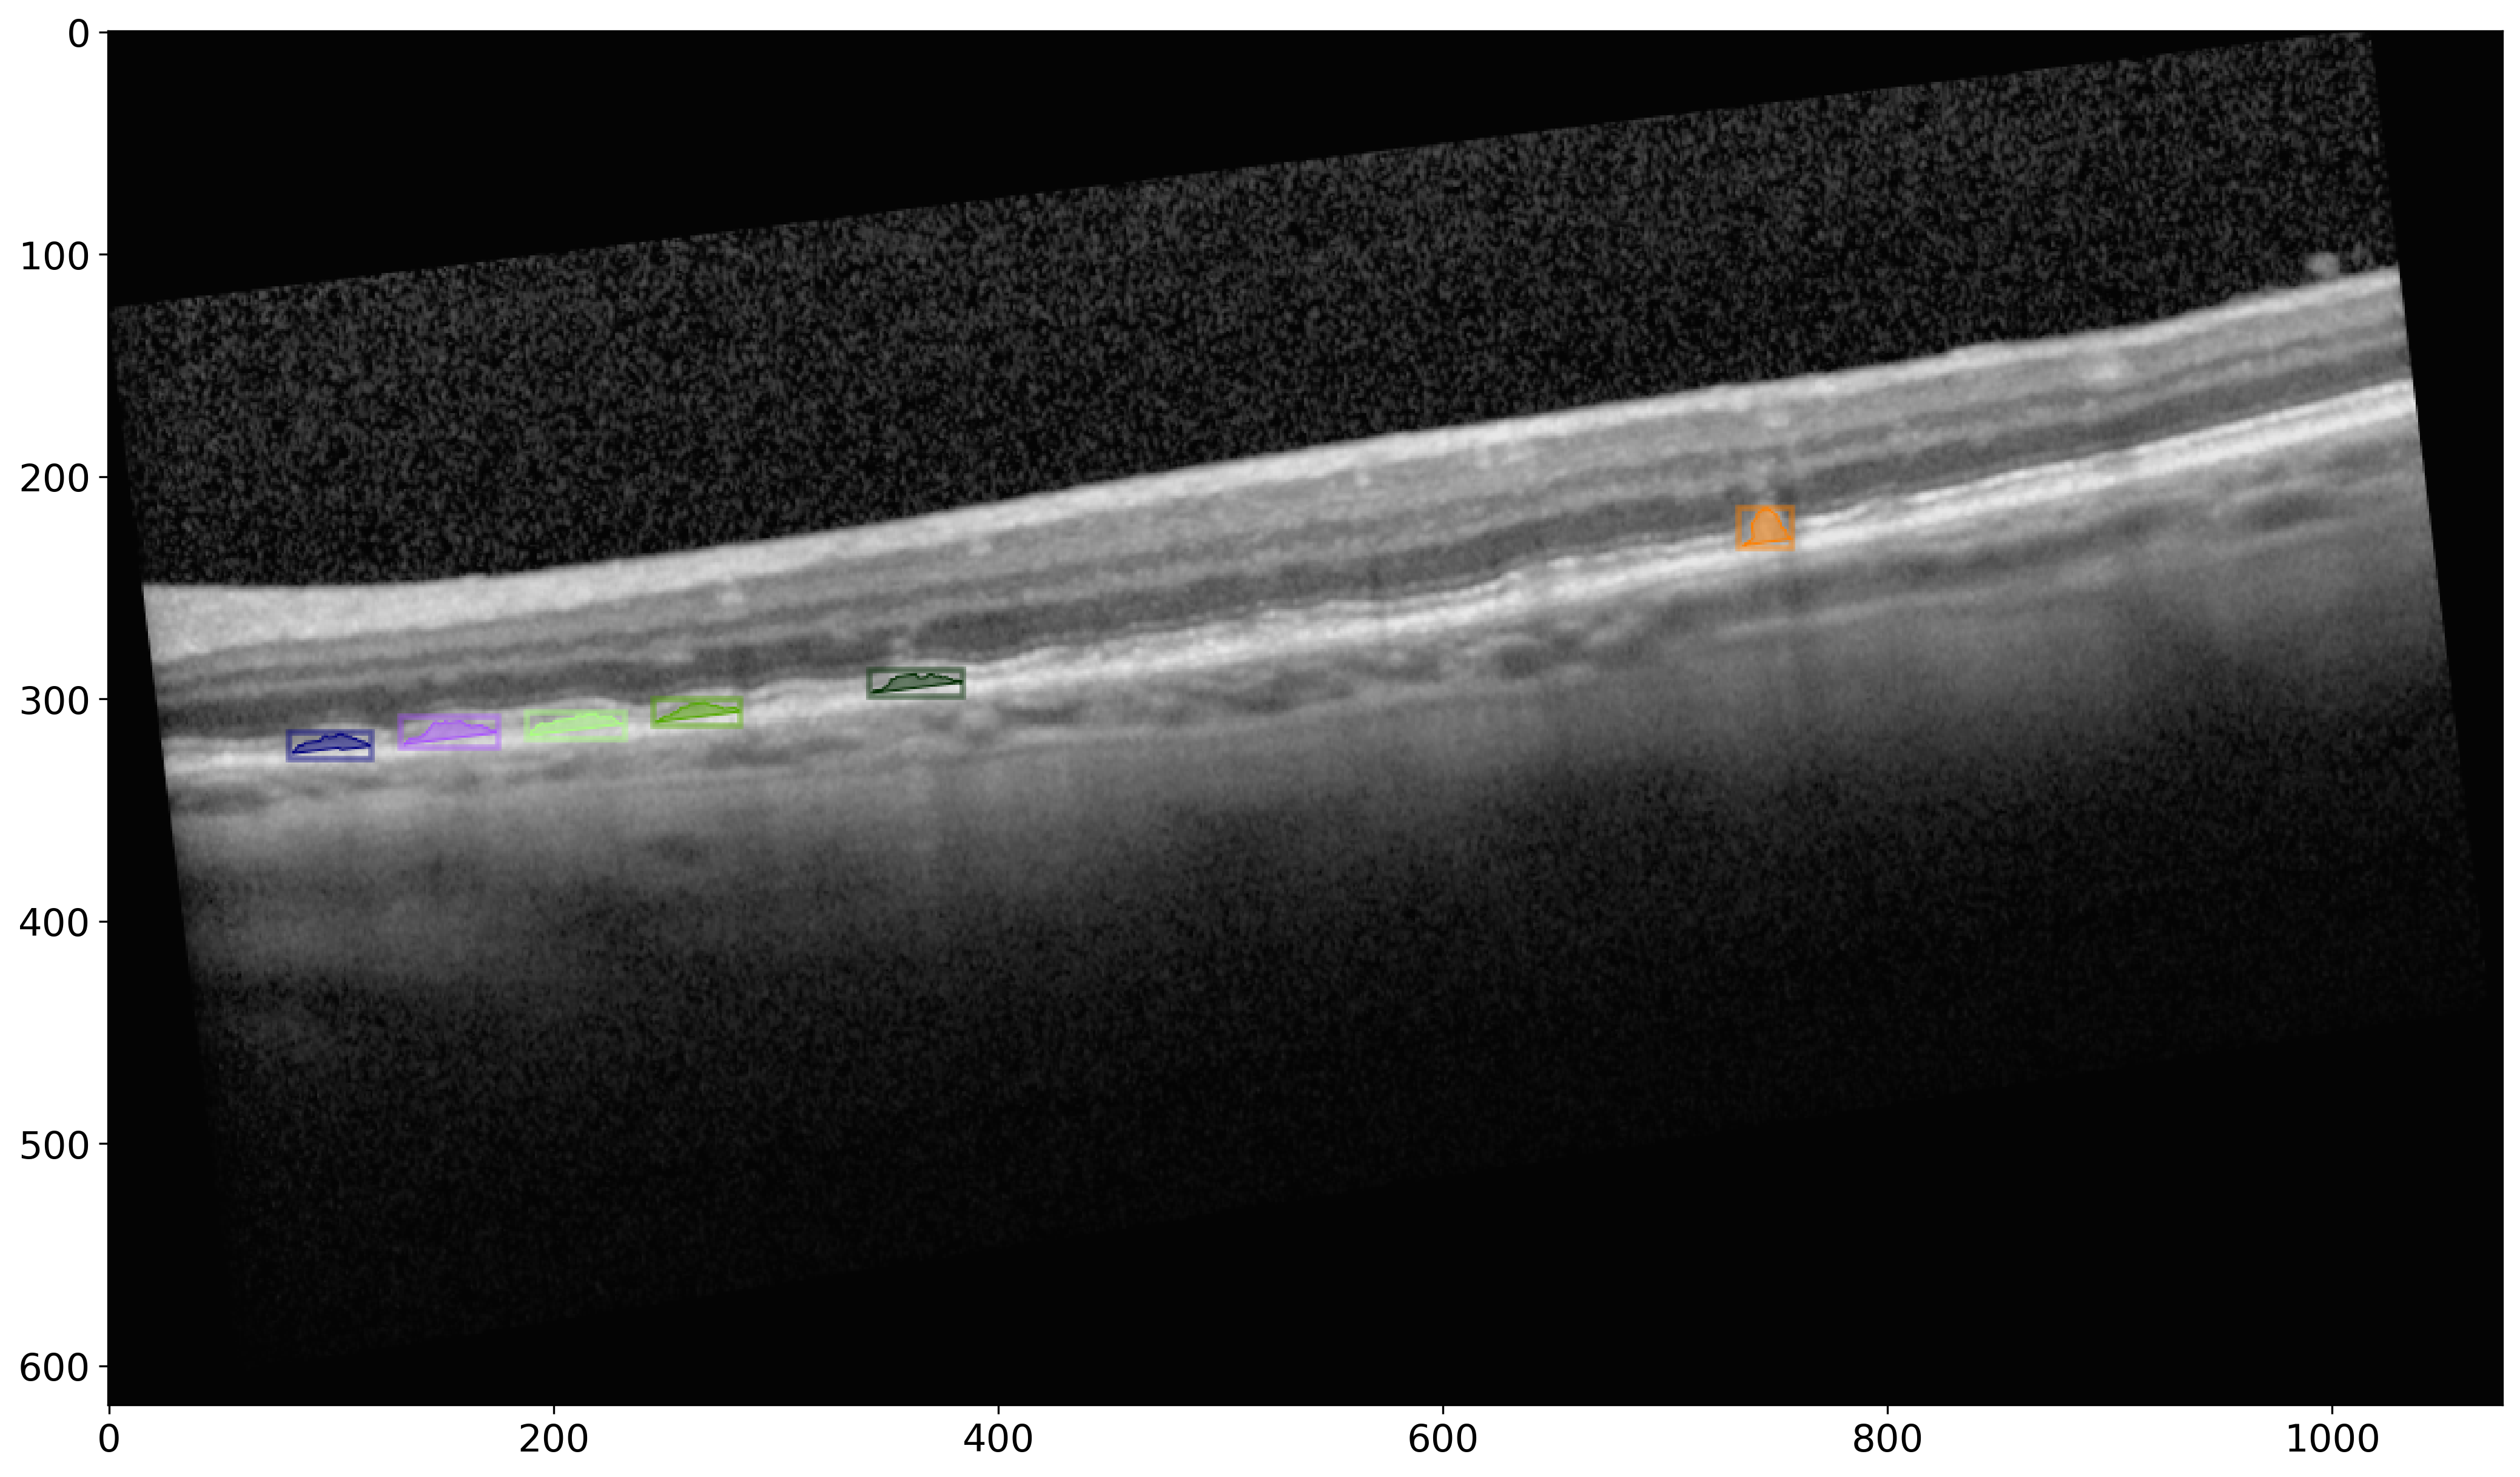

In [8]:
im = torch.movedim((inputs[0]['image']),0,2)
plt.figure(figsize=[22,10],dpi=300)
# plt.imshow(im)
v = Visualizer(im, MetadataCatalog.get("rpd_train"), scale=1.0)
if len(inputs[0]['instances'])>0:
    result_image =v.overlay_instances(boxes = inputs[0]['instances'].gt_boxes,masks = inputs[0]['instances'].gt_masks).get_image()
    plt.imshow(result_image)
else:
    plt.imshow(im)

